In [3]:
#By: Amr Ezzat 
!pip install tpot
!pip install xgboost

In [17]:
import tpot
#Had a previous error, had to import XGboost model 
import xgboost 
from tpot import  TPOTClassifier

#importing ML Packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from __future__ import print_function

#Load EDA packages
import pandas as pd
import numpy as np

In [21]:
td = pd.read_csv('/Users/home/Documents/Downloads/titanic.csv', engine ='python')

In [22]:
td.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [23]:
print ("Rows     : " ,td.shape[0])
print ("Columns  : " ,td.shape[1])

Rows     :  887
Columns  :  8


In [36]:
#Check the data type of variables (Only Numerical values are accepted by TPOT)
td.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [29]:
#Importing the packages we need to convert into numerical values
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

In [30]:
#We will not change name, we will just get remove it later on 
categorical_columns = ['Sex']
column_trans = make_column_transformer((OrdinalEncoder(), categorical_columns))

titanic_transformed=column_trans.fit_transform(td)

In [31]:
#Copying new data back into td 
titanic_trans = td.copy()
titanic_trans = pd.DataFrame(titanic_transformed, columns=categorical_columns)
td.update(titanic_trans)

In [33]:
#Checking if the conversion has been successful
td

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,0,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,1,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,0,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,0,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,1,26.0,0,0,30.0000


In [37]:
#Sex has been converted successfully but it is still seen as an object 
td.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [38]:
#Making sure Sex data type is changed 
td.iloc[:, 3] = pd.to_numeric(td.iloc[:, 3], errors='coerce') 

In [39]:
#Sex data type changed successfully. 
td.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                        float64
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [40]:
#Checking for missing data
td.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [41]:
td.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [42]:
# Methods and Attributes 
dir(tpot)

['TPOTClassifier',
 'TPOTRegressor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'base',
 'builtins',
 'config',
 'decorators',
 'driver',
 'export_utils',
 'gp_deap',
 'gp_types',
 'main',
 'metrics',
 'operator_utils',
 'tpot']

In [55]:
#Arrange data (Remove 'Name' and 'Survived', set 'Survived' as the value we want to predict)
td_X = td.drop("Survived", axis=1)
td_X = td_X.drop("Name", axis=1)
td_y = td['Survived']

In [56]:
#Split in train and test
X_train, X_test, y_train, y_test = train_test_split(td_X, td_y, train_size=0.8, test_size=0.2)

In [57]:
#Checking the split was done properly
X_train

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
884,3,0.0,7.0,1,2,23.4500
268,1,1.0,28.0,0,0,31.0000
187,3,1.0,40.0,1,1,15.5000
726,1,0.0,29.0,0,0,211.3375
589,3,1.0,47.0,0,0,7.2500
...,...,...,...,...,...,...
870,2,0.0,28.0,1,0,24.0000
144,2,1.0,19.0,1,1,36.7500
647,3,1.0,23.0,0,0,7.8958
390,3,1.0,28.0,2,0,7.9250


In [99]:
### AUTOML TPOT INIT/Fit data/Score
tpot =  TPOTClassifier(generations=10, population_size=30, verbosity=2, random_state = 45)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))


Generation 1 - Current best internal CV score: 0.8405953451203676

Generation 2 - Current best internal CV score: 0.8405953451203676

Generation 3 - Current best internal CV score: 0.8405953451203676

Generation 4 - Current best internal CV score: 0.8462491259614422

Generation 5 - Current best internal CV score: 0.8462491259614422

Generation 6 - Current best internal CV score: 0.8504744780741185

Generation 7 - Current best internal CV score: 0.8504744780741185

Generation 8 - Current best internal CV score: 0.8504744780741185

Generation 9 - Current best internal CV score: 0.8504744780741185

Generation 10 - Current best internal CV score: 0.8533113575067425

Best pipeline: ExtraTreesClassifier(MaxAbsScaler(input_matrix), bootstrap=False, criterion=gini, max_features=0.4, min_samples_leaf=1, min_samples_split=10, n_estimators=100)
0.8089887640449438


In [100]:
print(tpot.score(X_test, y_test))

0.8089887640449438


In [101]:
tpot.fitted_pipeline_

Pipeline(steps=[('maxabsscaler', MaxAbsScaler()),
                ('extratreesclassifier',
                 ExtraTreesClassifier(max_features=0.4, min_samples_split=10,
                                      random_state=45))])

In [102]:
tpot.fit(X_train, y_train)


Generation 1 - Current best internal CV score: 0.8405953451203676

Generation 2 - Current best internal CV score: 0.8405953451203676

Generation 3 - Current best internal CV score: 0.8405953451203676

Generation 4 - Current best internal CV score: 0.8462491259614422

Generation 5 - Current best internal CV score: 0.8462491259614422

Generation 6 - Current best internal CV score: 0.8504744780741185

Generation 7 - Current best internal CV score: 0.8504744780741185

Generation 8 - Current best internal CV score: 0.8504744780741185

Generation 9 - Current best internal CV score: 0.8504744780741185

Generation 10 - Current best internal CV score: 0.8533113575067425

Best pipeline: ExtraTreesClassifier(MaxAbsScaler(input_matrix), bootstrap=False, criterion=gini, max_features=0.4, min_samples_leaf=1, min_samples_split=10, n_estimators=100)


TPOTClassifier(generations=10, population_size=30, random_state=45, verbosity=2)

In [103]:
exctracted_best_model = tpot.fitted_pipeline_.steps[-1][1]

In [104]:
exctracted_best_model.fit(X_train, y_train) 

ExtraTreesClassifier(max_features=0.4, min_samples_split=10, random_state=45)

In [105]:
exctracted_best_model.feature_importances_

array([0.15381692, 0.48779386, 0.1560083 , 0.03727633, 0.03774451,
       0.12736007])

In [106]:
import matplotlib.pyplot as plt
import matplotlib

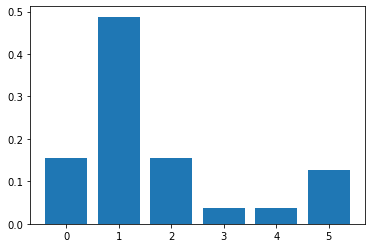

In [107]:
positions= range(exctracted_best_model.feature_importances_.shape[0])
p1 = plt.bar(positions, exctracted_best_model.feature_importances_)
plt.show()

In [108]:
td.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [109]:
tpot.export('tpot_titanic_pipeline.py')

In [110]:
!cat tpot_titanic_pipeline.py

import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MaxAbsScaler
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=45)

# Average CV score on the training set was: 0.8533113575067425
exported_pipeline = make_pipeline(
    MaxAbsScaler(),
    ExtraTreesClassifier(bootstrap=False, criterion="gini", max_features=0.4, min_samples_leaf=1, min_samples_split=10, n_estimators=100)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.st